This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6281 - accuracy: 0.8124 - val_loss: 0.2473 - val_accuracy: 0.9287
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2491 - accuracy: 0.9227 - val_loss: 0.2044 - val_accuracy: 0.9373
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1623 - accuracy: 0.9503 - val_loss: 0.1476 - val_accuracy: 0.9557
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1147 - accuracy: 0.9638 - val_loss: 0.1249 - val_accuracy: 0.9629
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0832 - accuracy: 0.9733 - val_loss: 0.1535 - val_accuracy: 0.9558
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.2632 - val_accuracy: 0.9272
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0457 - accuracy: 0.9852 - val_loss: 0.1149 - val_accuracy: 0.9695
Epoch 

**Plotting a validation accuracy comparison**

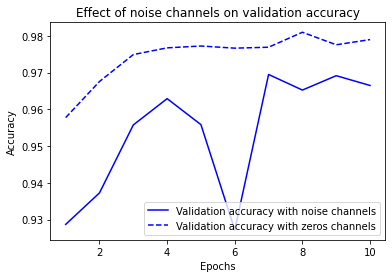

In [18]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [19]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3179 - accuracy: 0.1040 - val_loss: 2.3058 - val_accuracy: 0.1049
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.1176 - val_loss: 2.3132 - val_accuracy: 0.1045
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2893 - accuracy: 0.1285 - val_loss: 2.3188 - val_accuracy: 0.1058
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2754 - accuracy: 0.1410 - val_loss: 2.3272 - val_accuracy: 0.1077
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2581 - accuracy: 0.1535 - val_loss: 2.3379 - val_accuracy: 0.1022
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2361 - accuracy: 0.1672 - val_loss: 2.3567 - val_accuracy: 0.1047
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2109 - accuracy: 0.1846 - val_loss: 2.3630 - val_accuracy: 0.1013

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [20]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),     #너무 큰 learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 952.2266 - accuracy: 0.4370 - val_loss: 2.3319 - val_accuracy: 0.2527
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.7712 - accuracy: 0.2801 - val_loss: 2.1890 - val_accuracy: 0.2812
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 4.2366 - accuracy: 0.2758 - val_loss: 2.4889 - val_accuracy: 0.2834
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8472 - accuracy: 0.2851 - val_loss: 2.4815 - val_accuracy: 0.3467
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1560 - accuracy: 0.2879 - val_loss: 2.1385 - val_accuracy: 0.2997
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8621 - accuracy: 0.2885 - val_loss: 2.1078 - val_accuracy: 0.2733
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7350 - accuracy: 0.2888 - val_loss: 2.5006 - val_accuracy: 0.3146
Epoc

In [31]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

**The same model with a more appropriate learning rate**

In [21]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),  # 적절한 learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3924 - accuracy: 0.9103 - val_loss: 0.1496 - val_accuracy: 0.9581
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1453 - accuracy: 0.9628 - val_loss: 0.1953 - val_accuracy: 0.9596
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1176 - accuracy: 0.9720 - val_loss: 0.1635 - val_accuracy: 0.9680
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0980 - accuracy: 0.9781 - val_loss: 0.2229 - val_accuracy: 0.9668
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9816 - val_loss: 0.2243 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0809 - accuracy: 0.9833 - val_loss: 0.2664 - val_accuracy: 0.9672
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9868 - val_loss: 0.2612 - val_accuracy: 0.9706
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [22]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6625 - accuracy: 0.8363 - val_loss: 0.3583 - val_accuracy: 0.9029
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.9029 - val_loss: 0.3061 - val_accuracy: 0.9155
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3155 - accuracy: 0.9119 - val_loss: 0.2906 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.9163 - val_loss: 0.2810 - val_accuracy: 0.9216
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2899 - accuracy: 0.9198 - val_loss: 0.2752 - val_accuracy: 0.9244
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2831 - accuracy: 0.9206 - val_loss: 0.2708 - val_accuracy: 0.9252
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.9226 - val_loss: 0.2706 - val_accuracy: 0.9266
Epoch 

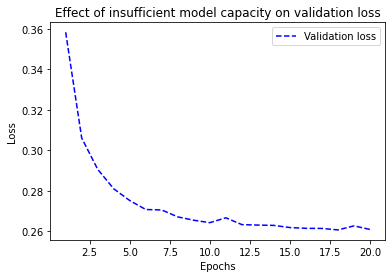

In [23]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [24]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3604 - accuracy: 0.8980 - val_loss: 0.1864 - val_accuracy: 0.9467
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1608 - accuracy: 0.9518 - val_loss: 0.1342 - val_accuracy: 0.9612
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1140 - accuracy: 0.9665 - val_loss: 0.1100 - val_accuracy: 0.9677
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9730 - val_loss: 0.1159 - val_accuracy: 0.9664
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9780 - val_loss: 0.1056 - val_accuracy: 0.9699
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9825 - val_loss: 0.0955 - val_accuracy: 0.9727
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0483 - accuracy: 0.9858 - val_loss: 0.0986 - val_accuracy: 0.9714
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5106 - accuracy: 0.7908 - val_loss: 0.3740 - val_accuracy: 0.8774
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2974 - accuracy: 0.9049 - val_loss: 0.3113 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2190 - accuracy: 0.9289 - val_loss: 0.2754 - val_accuracy: 0.8945
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1718 - accuracy: 0.9452 - val_loss: 0.2744 - val_accuracy: 0.8935
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1391 - accuracy: 0.9555 - val_loss: 0.2977 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1143 - accuracy: 0.9659 - val_loss: 0.3216 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0988 - accuracy: 0.9701 - val_loss: 0.3492 - val_accuracy: 0.8781
Epoch 8/20
30

**Version of the model with lower capacity**

In [26]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6537 - accuracy: 0.6343 - val_loss: 0.6125 - val_accuracy: 0.7693
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5742 - accuracy: 0.7693 - val_loss: 0.5461 - val_accuracy: 0.8200
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4992 - accuracy: 0.8590 - val_loss: 0.4779 - val_accuracy: 0.8601
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4189 - accuracy: 0.8998 - val_loss: 0.4162 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3476 - accuracy: 0.9203 - val_loss: 0.3620 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2890 - accuracy: 0.9299 - val_loss: 0.3245 - val_accuracy: 0.8894
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2445 - accuracy: 0.9361 - val_loss: 0.3034 - val_accuracy: 0.8934
Epoch 8/20
30

**Version of the model with higher capacity**

In [27]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5435 - accuracy: 0.7532 - val_loss: 0.3705 - val_accuracy: 0.8413
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2502 - accuracy: 0.9001 - val_loss: 0.2709 - val_accuracy: 0.8913
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1524 - accuracy: 0.9405 - val_loss: 0.3015 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0917 - accuracy: 0.9696 - val_loss: 0.4819 - val_accuracy: 0.8542
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0856 - accuracy: 0.9810 - val_loss: 0.3026 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0086 - accuracy: 0.9997 - val_loss: 0.5060 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 7.4830e-04 - accuracy: 1.0000 - val_loss: 0.6214 - val_accuracy: 0.8830
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [28]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5956 - accuracy: 0.7751 - val_loss: 0.4674 - val_accuracy: 0.8630
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4007 - accuracy: 0.8943 - val_loss: 0.4018 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3340 - accuracy: 0.9163 - val_loss: 0.3787 - val_accuracy: 0.8808
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3046 - accuracy: 0.9236 - val_loss: 0.3634 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2830 - accuracy: 0.9321 - val_loss: 0.3714 - val_accuracy: 0.8815
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2739 - accuracy: 0.9340 - val_loss: 0.3626 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2604 - accuracy: 0.9391 - val_loss: 0.4251 - val_accuracy: 0.8609
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [29]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [30]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6403 - accuracy: 0.6253 - val_loss: 0.5456 - val_accuracy: 0.8325
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5239 - accuracy: 0.7611 - val_loss: 0.4333 - val_accuracy: 0.8703
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4352 - accuracy: 0.8279 - val_loss: 0.3479 - val_accuracy: 0.8822
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3735 - accuracy: 0.8655 - val_loss: 0.3181 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3302 - accuracy: 0.8847 - val_loss: 0.2946 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2807 - accuracy: 0.9079 - val_loss: 0.2815 - val_accuracy: 0.8910
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2529 - accuracy: 0.9189 - val_loss: 0.2999 - val_accuracy: 0.8861
Epoch 8/20
30

## Summary